In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

# 1) Delivery_time -> Predict delivery time using sorting time 

In [25]:
data=pd.read_csv("delivery_time.csv")

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [27]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [28]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

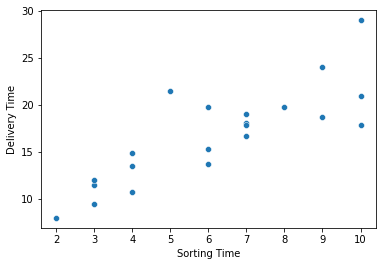

In [29]:
sns.scatterplot(x=data['Sorting Time'],y=data['Delivery Time'])

## Correlation

In [30]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


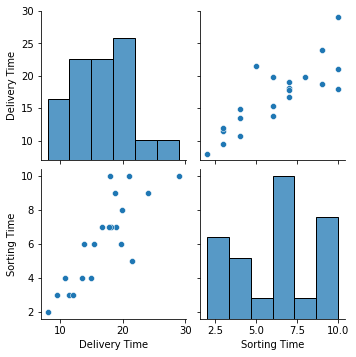

In [31]:
sns.pairplot(data)

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

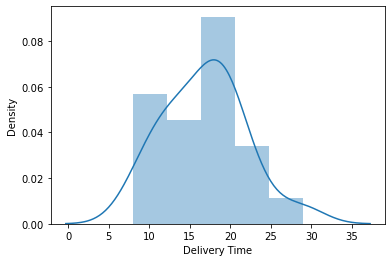

In [32]:
sns.distplot(data['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

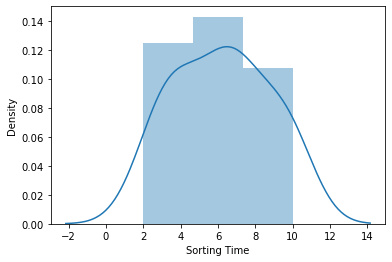

In [33]:
sns.distplot(data['Sorting Time'])

In [34]:
data.shape

(21, 2)

In [35]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

## Fitting a Linear Regression Model

In [37]:
lm = LinearRegression()

X = data["Sorting Time"].values.reshape(21,-1)
Y = data["Delivery Time"].values.reshape(21,-1)

reg_sklearn = lm.fit(X,Y)


In [38]:
print (reg_sklearn.coef_)
print (reg_sklearn.intercept_)

[[1.6490199]]
[6.58273397]


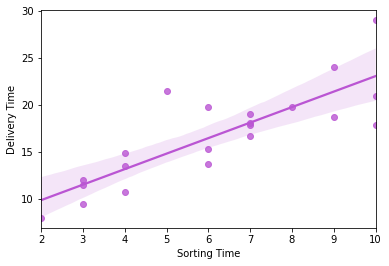

In [39]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=data, color='mediumorchid');

## model validation

In [40]:
pred_train_lm =reg_sklearn.predict(X)
r2_score(data["Delivery Time"],pred_train_lm)


0.6822714748417231

In [50]:
df=data.rename({'Sorting Time':'Sorting_Time','Delivery Time':'Delivery_Time'},axis=1)

In [51]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [59]:
## log model
model2 = smf.ols("Delivery_Time~ np.log(Sorting_Time)",data=df).fit()
(model2.rsquared,model2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [60]:
# Exponential model
model3 = smf.ols("np.log(Delivery_Time)~ Sorting_Time",data=df).fit()
(model3.rsquared,model3.rsquared_adj)

(0.7109478980584187, 0.6957346295351776)

In [61]:
#sqrt(x)
model4 = smf.ols("Delivery_Time~ np.sqrt(Sorting_Time)",data=df).fit()
(model4.rsquared,model4.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

In [ ]:
# By comparing all the models we can conclude that exponential model is a good model, as it is giving high rsquare value.

## 2) Salary_hike -> Build a prediction model for Salary_hike

In [62]:
hike=pd.read_csv('Salary_Data.csv')

In [63]:
hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [64]:
hike.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [65]:
hike.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [66]:
hike.shape

(30, 2)

In [67]:
hike1=hike.drop_duplicates()

In [68]:
hike1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [69]:
hike1.shape

(30, 2)

In [70]:
hike2=hike1.rename({'YearsExperience':'Years_of_Experience'},axis=1)

In [71]:
hike2.head()

,Years_of_Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Outlier Detection

<AxesSubplot:>

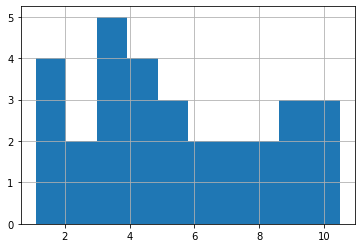

In [72]:
hike2['Years_of_Experience'].hist()

## Scatter Plot and Correlation analysis

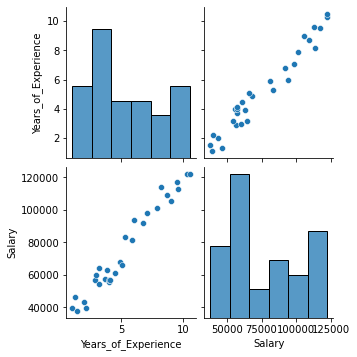

In [73]:
sns.pairplot(hike2)

In [74]:
# correlation
hike2.corr()

,Years_of_Experience,Salary
Years_of_Experience,1.000000,0.978242
Salary,0.978242,1.000000


In [75]:
lm = LinearRegression()

X = hike2["Years_of_Experience"].values.reshape(30,-1)
Y = hike2["Salary"].values.reshape(30,-1)

reg_sklearn = lm.fit(X,Y)

In [76]:
print (reg_sklearn.coef_)
print (reg_sklearn.intercept_)

[[9449.96232146]]
[25792.20019867]


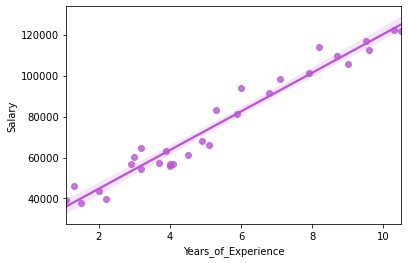

In [77]:
sns.regplot(x="Years_of_Experience", y="Salary", data=hike2, color='mediumorchid');

In [78]:
pred_train_lm =reg_sklearn.predict(X)
r2_score(hike2["Salary"],pred_train_lm)


0.9569566641435086

## using stats model

In [79]:
model = smf.ols("Salary~Years_of_Experience",data = hike2).fit()

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           1.14e-20
Time:                        22:42:35   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Years_of_Experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#Coefficients
model.params

Intercept              25792.200199
Years_of_Experience     9449.962321
dtype: float64

In [83]:
#t and p-Values
print(model.tvalues)    

Intercept              11.346940
Years_of_Experience    24.950094
dtype: float64


In [84]:
print( model.pvalues)   

Intercept              5.511950e-12
Years_of_Experience    1.143068e-20
dtype: float64


In [85]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [86]:
## log model
model = smf.ols("Salary~np.log(Years_of_Experience)",data = hike2).fit()
(model.rsquared,model.rsquared_adj)

(0.853888882875697, 0.8486706286926862)

In [87]:
# Exponential model
model = smf.ols("np.log(Salary)~(Years_of_Experience)",data = hike2).fit()
(model.rsquared,model.rsquared_adj)

(0.9319671194084194, 0.9295373736730057)

In [88]:
# sqrt(x)
model = smf.ols("Salary~np.sqrt(Years_of_Experience)",data = hike2).fit()
(model.rsquared,model.rsquared_adj)

(0.9310009544993526, 0.9285367028743294)

#### By comparing all these models r square is high for salary~experience, hence we can do for the first model

## Predict for new data point

In [89]:

newdata=pd.Series([.55,.89])

In [90]:
data_pred=pd.DataFrame(newdata,columns=['Salary'])
data_pred

,Salary
0,0.55
1,0.89
